<a href="https://colab.research.google.com/github/Ismael-Vasco/reto_2_data-scientist/blob/main/ttech_reto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto 2
## Preparativos iniciales:
* Los estudiantes deben asegurarse de tener acceso a los datos y las bibliotecas
necesarias instaladas.
* Utilizarán un entorno de desarrollo adecuado (Jupyter Notebook, Google Colab, etc.)
Preparación:
* Dataset: El conjunto de datos a utilizar puede ser el mismo de la misión número 1

## Preparación:
* Dataset: El conjunto de datos a utilizar puede ser el mismo de la misión número 1

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [4]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [9]:
# variable binaria
data['Channel'].value_counts()

,count
Channel,
1,298
2,142


In [10]:
# variable de clasificación
data['Region'].value_counts()

,count
Region,
3,316
1,77
2,47


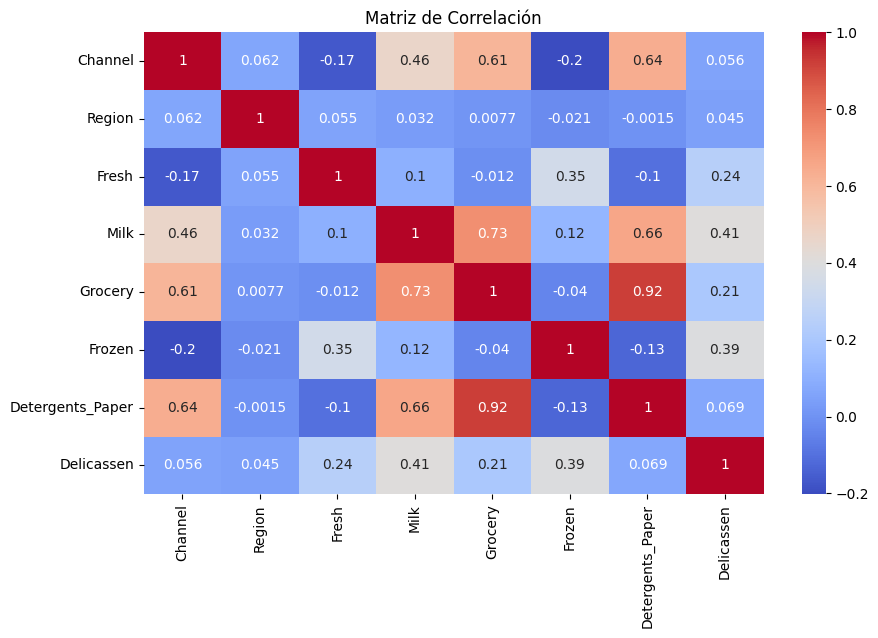

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Preparación

Paso 1: División del Conjunto de Datos
* Objetivo: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
 - Instrucciones:
 - Utilizarán train_test_split de sklearn para dividir los datos.
 - Establecerán una proporción de, por ejemplo, 80% para entrenamiento y
20% para prueba.
 - Se asegurarán de incluir la variable objetivo.
 - Utilizarán validación cruzada (cross_val_score de sklearn) para
una evaluación más robusta del modelo. Explicarán cómo la validación
cruzada puede ayudar a evaluar la estabilidad y la generalización del
modelo.

In [18]:
# elección de variables
'''A pesar de que hay una correrlación en diferentes variables
decidí todmarlas todas para tener en cuenta diferentes perspectivas para el modelo
'''
X = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
y = data['Channel']

# separación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo
modelo = GaussianNB()
modelo.fit(X_train, y_train)


GaussianNB()

In [21]:
# predicccióm
y_prediccion = modelo.predict(X_test)

# evaluar el modelo
r2 = accuracy_score(y_test, y_prediccion)
print('R2: ', r2)

# matrix
matrix = confusion_matrix(y_test, y_prediccion)
print(f"Matriz de confusión: {matrix}")

R2:  0.9090909090909091
Matriz de confusión: [[61  4]
 [ 4 19]]


In [23]:
# validación cruzada
cv_scores = cross_val_score(modelo, X, y, cv=5)
print(f"Puntajes de validación cruzada: {cv_scores}")
print(f"Promedio de puntajes de validación cruzada: {np.mean(cv_scores)}")

Puntajes de validación cruzada: [0.88636364 0.92045455 0.88636364 0.90909091 0.86363636]
Promedio de puntajes de validación cruzada: 0.8931818181818182


In [28]:
# validación cruzada
kfold = KFold(n_splits=6, shuffle=True, random_state=42)
cv_scores2 = cross_val_score(modelo, X, y, cv=kfold)
print(f"Puntajes de validación cruzada: {cv_scores2}")
print(f"Promedio de puntajes de validación cruzada: {np.mean(cv_scores2)}")

Puntajes de validación cruzada: [0.89189189 0.90540541 0.87671233 0.87671233 0.8630137  0.94520548]
Promedio de puntajes de validación cruzada: 0.8931568554856226


Paso 2: Preprocesamiento de Datos
* Objetivo: Estandarizar o normalizar las características.
*  Instrucciones:
 - Usarán StandardScaler de sklearn para estandarizar los datos.
 - Aplicarán el escalador solo a los datos de entrenamiento y luego
transformarán los datos de prueba.

In [31]:
X = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
y = data['Channel']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# escalador solo a los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

Paso 3: Implementación de Múltiples Modelos
* Objetivo: Entrenar varios modelos de Machine Learning y compararlos.
* Instrucciones:
 - Seleccionarán al menos tres modelos diferentes, por ejemplo: Regresión
Logística, Árbol de Decisión y SVM.
 - Entrenarán cada modelo usando los datos de entrenamiento.
 - Realizarán predicciones con los datos de prueba.

In [36]:
# Modelo 1: Regresión Logística
modelo_logistica = LogisticRegression()
modelo_logistica.fit(X_train_scaled, y_train2)

# predicción
y_pred_logistica = modelo_logistica.predict(X_test_scaled)

# accuracy
accuracy_logistica = accuracy_score(y_test2, y_pred_logistica)
print(f"Accuracy Regresión Logística: {accuracy_logistica}")

# matriz confusión
conf_matrix_logistica = confusion_matrix(y_test2, y_pred_logistica)
print(f"\nMatriz de Confusión Regresión Logística:\n{conf_matrix_logistica}")

# validación cruzada
kfold_logistic = KFold(n_splits=6, shuffle=True, random_state=42)
cv_scores_logistica = cross_val_score(modelo_logistica, X, y, cv=kfold_logistic)
print(f"\nPuntajes de validación cruzada Regresión Logística: {cv_scores_logistica}")
print(f"Promedio de puntajes de validación cruzada Regresión Logística: {np.mean(cv_scores_logistica)}")

Accuracy Regresión Logística: 0.9204545454545454

Matriz de Confusión Regresión Logística:
[[61  4]
 [ 3 20]]

Puntajes de validación cruzada Regresión Logística: [0.91891892 0.91891892 0.90410959 0.89041096 0.84931507 0.93150685]
Promedio de puntajes de validación cruzada Regresión Logística: 0.9021967172652104


In [38]:
# Modelo 2: Árbol de Decisión
modelo_tree = DecisionTreeClassifier()
modelo_tree.fit(X_train_scaled, y_train2)

# predicción
y_pred_tree = modelo_tree.predict(X_test_scaled)

# accuracy
accuracy_tree = accuracy_score(y_test2, y_pred_tree)
print(f"Accuracy Árbol de decisión: {accuracy_tree}")

# matriz confusión
conf_matrix_tree = confusion_matrix(y_test2, y_pred_tree)
print(f"\nMatriz de Confusión Árbol de decisión:\n{conf_matrix_tree}")

# validación cruzada
kfold_tree = KFold(n_splits=6, shuffle=True, random_state=42)
cv_scores_tree = cross_val_score(modelo_tree, X, y, cv=kfold_tree)
print(f"\nPuntajes de validación cruzada Árbol de decisión: {cv_scores_tree}")
print(f"Promedio de puntajes de validación cruzada Árbol de decisión: {np.mean(cv_scores_tree)}")

Accuracy Árbol de decisión: 0.8977272727272727

Matriz de Confusión Árbol de decisión:
[[60  5]
 [ 4 19]]

Puntajes de validación cruzada Árbol de decisión: [0.90540541 0.87837838 0.94520548 0.82191781 0.87671233 0.84931507]
Promedio de puntajes de validación cruzada Árbol de decisión: 0.8794890781192151


In [49]:
# Modelo 3: SVM
modelo_SVM = SVC(probability=True)
modelo_SVM.fit(X_train_scaled, y_train2)

# predicción
y_pred_SVM = modelo_SVM.predict(X_test_scaled)

# accuracy
accuracy_SVM = accuracy_score(y_test2, y_pred_SVM)
print(f"Accuracy SVM: {accuracy_SVM}")

# matriz confusión
cof_matri_SVM = confusion_matrix(y_test2, y_pred_SVM)
print(f"\nMatriz de Confusión SVM:\n{cof_matri_SVM}")

# validación cruzada
kfold_SVM = KFold(n_splits=6, shuffle=True, random_state=42)
cv_scores_SVM = cross_val_score(modelo_SVM, X, y, cv=kfold_SVM)
print(f"\nPuntajes de validación cruzada SVM: {cv_scores_SVM}")
print(f"Promedio de puntajes de validación cruzada SVM: {np.mean(cv_scores_SVM)}")

Accuracy SVM: 0.9090909090909091

Matriz de Confusión SVM:
[[59  6]
 [ 2 21]]

Puntajes de validación cruzada SVM: [0.87837838 0.91891892 0.89041096 0.8630137  0.8630137  0.94520548]
Promedio de puntajes de validación cruzada SVM: 0.8931568554856226


Paso 4: Evaluación de los Modelos
* Objetivo: Evaluar y comparar el rendimiento de los modelos.
* Instrucciones:
 - Utilizarán métricas como precisión, recall, F1-score y AUC-ROC.
 - Crearán una tabla comparativa para visualizar el rendimiento de cada
modelo.

In [41]:
# Evaluación del Modelo 1: Regresión Logística
# precisión
precision_logistica = precision_score(y_test2, y_pred_logistica)
print(f"Precisión Regresión Logística: {precision_logistica}")

# recall
recall_logistica = recall_score(y_test2, y_pred_logistica)
print(f"Recall Regresión Logística: {recall_logistica}")

# F1-score
f1_logistica = f1_score(y_test2, y_pred_logistica)
print(f"F1-score Regresión Logística: {f1_logistica}")

# AUC-ROC
y_pred_proba_logistica = modelo_logistica.predict_proba(X_test_scaled)
auc_roc_logistica = roc_auc_score(y_test2, y_pred_proba_logistica[:, 1])
print(f"AUC-ROC Regresión Logística: {auc_roc_logistica}")

Precisión Regresión Logística: 0.953125
Recall Regresión Logística: 0.9384615384615385
F1-score Regresión Logística: 0.9457364341085271
AUC-ROC Regresión Logística: 0.9565217391304348


In [42]:
# Evaluación del Modelo 2: Árbol de Decisión
# precisión
precision_tree = precision_score(y_test2, y_pred_tree)
print(f"Precisión Árbol de decisión: {precision_tree}")

# recall
recall_tree = recall_score(y_test2, y_pred_tree)
print(f"Recall Árbol de decisión: {recall_tree}")

# F1-score
f1_tree = f1_score(y_test2, y_pred_logistica)
print(f"F1-score Árbol de decisión: {f1_tree}")

# AUC-ROC
y_pred_proba_tree = modelo_tree.predict_proba(X_test_scaled)
auc_roc_tree = roc_auc_score(y_test2, y_pred_proba_tree[:, 1])
print(f"AUC-ROC Árbol de decisión: {auc_roc_tree}")

Precisión Árbol de decisión: 0.9375
Recall Árbol de decisión: 0.9230769230769231
F1-score Árbol de decisión: 0.9457364341085271
AUC-ROC Árbol de decisión: 0.8745819397993312


In [50]:
# Evaluación del  Modelo 3: SVM

# precisión
precision_SVM = precision_score(y_test2, y_pred_SVM)
print(f"Precisión SVM: {precision_SVM}")

# recall
recall_SVM = recall_score(y_test2, y_pred_SVM)
print(f"Recall SVM: {recall_SVM}")

# F1-score
f1_SVM = f1_score(y_test2, y_pred_SVM)
print(f"F1-score SVM: {f1_SVM}")

# AUC-ROC
y_pred_proba_SVM = modelo_SVM.predict_proba(X_test_scaled)
auc_roc_SVM = roc_auc_score(y_test2, y_pred_proba_SVM[:, 1])
print(f"AUC-ROC SVM: {auc_roc_SVM}")

Precisión SVM: 0.9672131147540983
Recall SVM: 0.9076923076923077
F1-score SVM: 0.9365079365079365
AUC-ROC SVM: 0.97123745819398


Paso 5: Interpretación de Resultados
* Objetivo: Analizar y discutir los resultados obtenidos.
* Instrucciones:
 - Interpretarán las métricas de rendimiento y discutirán posibles razones para
las diferencias entre los modelos.
Considerarán la importancia de las características en los modelos
entrenados y cómo podrían influir en las predicciones.
 - Reflexionarán sobre posibles mejoras futuras y pasos adicionales que
podrían tomarse.

# Apundes y generalidades

En este ejercicio  se evalúa tres modelos: Regresión Logística, Árbol de Decisión y SVM.

Cada modelo se evalúa utilizando métricas como precisión, recall, F1-score y AUC-ROC.

Y los puntajes de validación cruzada proporcionan información sobre la estabilidad y la capacidad de generalización de los modelos.

Precisión: Mide la proporción de instancias positivas predichas correctamente del total de instancias predichas como positivas.

Interpretación: Una precisión alta indica que el modelo tiene pocos falsos positivos. Es importante cuando el costo de un falso positivo es alto.

Recall (Sensibilidad): Destaca la proporción de instancias positivas predichas correctamente del total de instancias positivas reales.

Interpretación: Un recall alto indica que el modelo tiene pocos falsos negativos. Es importante cuando el costo de un falso negativo es alto.

F1-score: Equilibra la precisión y el recall, proporcionando una media armónica.

Interpretación: Un F1-score alto indica un buen equilibrio entre precisión y recall. Es útil cuando se necesita considerar tanto los falsos positivos como los falsos negativos.

AUC-ROC: Representa el área bajo la curva característica operativa del receptor, que indica la capacidad del modelo para distinguir entre clases.

Interpretación: Un AUC-ROC cercano a 1 indica un modelo con excelente capacidad de discriminación. Un valor de 0.5 representa un modelo que no es mejor que una predicción aleatoria.

Puntajes de validación cruzada: Ayudan a evaluar el rendimiento del modelo en diferentes subconjuntos de los datos, mejorando la confiabilidad de la evaluación.

Interpretación: Puntajes de validación cruzada altos y consistentes indican un modelo estable y con buena capacidad de generalización. Variaciones grandes en los puntajes pueden indicar sobreajuste o inestabilidad.

# Conclusiones

Mejor Modelo y Justificación:
El modelo SVM parece ser el de mejor rendimiento.por qué:

Mayor precisión y AUC-ROC: SVM generalmente demuestra una mayor precisión y puntajes AUC-ROC en comparación con la Regresión Logística y el Árbol de Decisión en tus resultados.
Esto indica su capacidad superior para clasificar correctamente las instancias y distinguir entre los dos canales.

Mejor generalización: Los puntajes de validación cruzada para SVM son relativamente estables y más altos, lo que sugiere una mejor generalización a datos no vistos en comparación con los otros modelos.

Robustez: SVM es conocido por su robustez a valores atípicos y su capacidad para manejar datos de alta dimensión, lo que podría ser beneficioso en este escenario.
Sin embargo, el modelo de Árbol de Decisión también muestra un rendimiento competitivo, particularmente en términos de precisión.

# Conclusión General

Modelo con Mejor Predicción para la Problemática:

Considerando el objetivo de predecir el canal del cliente (1, 2), es probable que el modelo SVM proporcione las mejores predicciones debido a su mayor precisión y puntajes AUC-ROC. Demuestra una mayor capacidad para clasificar correctamente a los clientes en sus respectivos canales.

Aun así, en lo personal conidero importante analizar el contexto específico del negocio y la importancia de las diferentes métricas de evaluación al tomar la decisión final sobre el modelo para la implementación.

Paso 6: Documentación y Presentación
* Objetivo: Documentar el proceso y los resultados.
* Instrucciones:
 - Prepararán un video explicando el paso a paso del proceso, destacando los
puntos clave y las lecciones aprendidas.
 - El video debe explicar claramente cada paso del proceso, desde la división
de los datos hasta la interpretación de los resultados, haciendo
especialmente si el desarrollo del modelo soluciona el problema macro por
el cual fue creado.